# Aggregate metrics for Job Characteristics

Some of these indicies combine multiple metrics. All indicies are normalized.

## Method

For 1+ underlying methics in the Occupational Requirements dataset, the raw values will be normalized (z-scores). Those scores will be summed (possiblity weighted) and the sum is normalized to create the final metric.

## Setup

1. Load preprocessed or data
2. Load metadata about estimates

In [1]:
import matplotlib
import pandas

In [2]:
data = pandas.read_csv('ordata-processed.csv')
data.head()

,occupation_code,00728,01030,01031,01032,01033,01034,01036,01037,01038,...,00643,00803,00804,01029,01084,01085,01087,01088,01090,01091
0,000,5.1,29.0,48.2,15.6,5.8,1.4,44.9,28.5,15.0,...,730.0,0.0,2.1,17.8,11.0,22.9,18.2,15.7,1.4,32.5
1,001,0.0,0.0,0.0,0.0,31.4,40.4,0.0,0.0,0.0,...,0.0,0.0,0.0,61.3,0.0,0.0,0.0,0.0,0.0,0.0
2,003,0.0,0.0,26.9,28.8,30.5,12.8,11.3,26.7,32.9,...,0.0,0.0,0.0,52.8,10.7,8.3,0.0,15.7,0.0,18.4
3,007,0.0,0.0,30.2,24.0,30.7,0.0,0.0,16.7,33.8,...,0.0,0.0,0.0,78.8,0.0,0.0,0.0,0.0,0.0,0.0
4,008,0.0,0.0,23.6,41.3,32.2,0.0,0.0,0.0,45.3,...,0.0,0.0,0.0,61.0,0.0,32.7,0.0,0.0,0.0,33.4


In [3]:
metadata = pandas.read_csv('ordata/or.estimate', delimiter='\t', index_col=False)
metadata['estimate_code'] = metadata['estimate_code'].map(lambda c: '{:05d}'.format(c))
metadata.head()

,estimate_code,estimate_text,display_level,selectable,sort_sequence
0,00064,"Percent of workers, svp is short demonstration...",0,T,889
1,00065,"Percent of workers, svp is beyond short demons...",0,T,890
2,00066,"Percent of workers, svp is over 1 month, up to...",0,T,891
3,00067,"Percent of workers, svp is over 3 months, up t...",0,T,892
4,00068,"Percent of workers, svp is over 6 months, up t...",0,T,893


## Indicies

Aggregate metrics/indices for:
- Physicality
- Pace of work
- Variety
- Danger
- Communication
 - Type of interaction
- Entry-level/experienced
- Ambiguous decision making

### Physicality Index

Combines underlying metrics:

| Estimate code | Name |
|---------------|------|
|00128|Hours of standing/walking (50th Percentile - median)|
|01006|Percent of day where standing/walking is required (50th Percentile - median)|
|00235|Pounds maximum weight lifted/carried (25th Percentile)|
|00236|Pounds maximum weight lifted/carried (50th Percentile - median)|
|00758|Percent of workers, crawling is required|
|00759|Percent of workers, crouching is required|
|00647|Percent of workers, pushing/pulling with feet only is required, frequently|
|00648|Percent of workers, pushing/pulling with feet only is required, constantly|
|00298|Percent of workers, pushing/pulling with feet/legs is required, frequently|
|00828|Percent of workers, pushing/pulling with feet/legs is required|
|00829|Percent of workers, pushing/pulling with hands/arms is required|
|00364|Percent of workers, climbing ramps or stairs (structure-related) is required|
|00752|Percent of workers, climbing ramps or stairs (work-related) is required|
|00751|Percent of workers, climbing ladders, ropes, or scaffolds is required|
|00398|Percent of workers, stooping is required, frequently|
|00411|Percent of workers, kneeling is required, occasionally|
|00663|Percent of workers, strength is medium work|
|00664|Percent of workers, strength is heavy work|
|00665|Percent of workers, strength is very heavy work|
|00827|Percent of workers, pushing/pulling with feet only is required|

In [4]:
codes = [
'00128',
'01006',
'00235',
'00236',
'00758',
'00759',
'00647',
'00648',
'00298',
'00828',
'00829',
'00364',
'00752',
'00751',
'00398',
'00411',
'00663',
'00664',
'00665',
'00827'
]

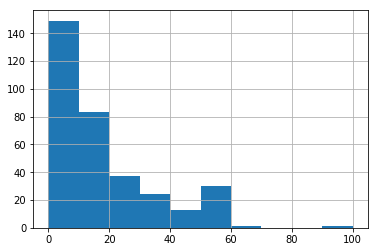

In [84]:
data['00235'].hist()

In [5]:
normalized = pandas.DataFrame({
    c: (data[c] - data[c].mean()) / (data[c].std())
    for c in codes
})
normalized.head()

,00128,00235,00236,00298,00364,00398,00411,00647,00648,00663,...,00665,00751,00752,00758,00759,00827,00828,00829,00830,01006
0,0.448901,-0.236834,0.342032,-0.054393,0.497566,-0.177239,-0.26815,-0.054393,-0.093623,0.717983,...,0.755588,0.224345,0.309129,0.218548,0.289982,0.423153,0.276998,0.255028,0.137278,0.656937
1,-1.096825,-0.236834,-0.984241,-0.054393,1.173077,-0.177239,-0.26815,-0.054393,-0.093623,-0.923510,...,-0.135364,-0.490730,0.114056,-0.422805,-1.389190,-0.149390,-0.804801,-0.879218,0.224480,-0.594527
2,-0.409836,-0.236834,-0.100059,-0.054393,0.364950,-0.177239,-0.26815,-0.054393,-0.093623,0.371446,...,-0.135364,-0.115985,0.290726,-0.422805,-0.432820,-0.149390,-0.479892,-0.483396,-0.595217,-0.469381
3,-1.096825,-0.825435,-0.542150,-0.054393,0.675768,-0.177239,-0.26815,-0.054393,-0.093623,-0.923510,...,-0.135364,-0.490730,0.117736,-0.422805,-1.389190,-0.149390,-0.804801,-0.879218,-1.013786,-1.095113
4,-0.409836,-0.236834,-0.542150,-0.054393,0.704778,-0.177239,-0.26815,-0.054393,-0.093623,-0.040751,...,-0.135364,-0.188640,0.312810,-0.422805,-0.600106,-0.149390,-0.804801,-0.879218,-0.473135,-0.469381


In [6]:
normalized['sum'] = normalized.sum(axis=1)
normalized['index'] = (normalized['sum'] - normalized['sum'].mean()) / normalized['sum'].std()
normalized.head()

,00128,00235,00236,00298,00364,00398,00411,00647,00648,00663,...,00752,00758,00759,00827,00828,00829,00830,01006,sum,index
0,0.448901,-0.236834,0.342032,-0.054393,0.497566,-0.177239,-0.26815,-0.054393,-0.093623,0.717983,...,0.309129,0.218548,0.289982,0.423153,0.276998,0.255028,0.137278,0.656937,5.299813,0.492775
1,-1.096825,-0.236834,-0.984241,-0.054393,1.173077,-0.177239,-0.26815,-0.054393,-0.093623,-0.923510,...,0.114056,-0.422805,-1.389190,-0.149390,-0.804801,-0.879218,0.224480,-0.594527,-7.637030,-0.710089
2,-0.409836,-0.236834,-0.100059,-0.054393,0.364950,-0.177239,-0.26815,-0.054393,-0.093623,0.371446,...,0.290726,-0.422805,-0.432820,-0.149390,-0.479892,-0.483396,-0.595217,-0.469381,-4.045064,-0.376109
3,-1.096825,-0.825435,-0.542150,-0.054393,0.675768,-0.177239,-0.26815,-0.054393,-0.093623,-0.923510,...,0.117736,-0.422805,-1.389190,-0.149390,-0.804801,-0.879218,-1.013786,-1.095113,-10.016020,-0.931286
4,-0.409836,-0.236834,-0.542150,-0.054393,0.704778,-0.177239,-0.26815,-0.054393,-0.093623,-0.040751,...,0.312810,-0.422805,-0.600106,-0.149390,-0.804801,-0.879218,-0.473135,-0.469381,-5.376029,-0.499861


In [39]:
def create_index(df, columns, weights=None):
    if weights is None:
        weights = [1.] * len(columns)
    assert len(weights) == len(columns)
    normalized = {}
    for c, w in zip(columns, weights):
        normalized[c] = (data[c] - data[c].mean()) / (data[c].std())
        normalized[c] = (normalized[c] - normalized[c].min()) * w
    normalized = pandas.DataFrame(normalized)
    sums = normalized.sum(axis=1)
    return (sums - sums.mean()) / sums.std()

In [40]:
physicality_index = create_index(data, codes)
physicality_index.head()

0    0.492775
1   -0.710089
2   -0.376109
3   -0.931286
4   -0.499861
dtype: float64

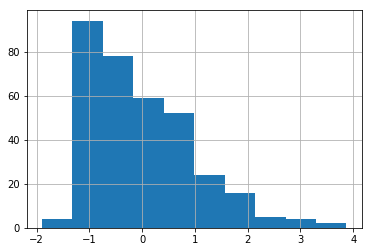

In [41]:
physicality_index.hist()

### Pace of work

| Estimate code | Name |
|---------------|------|
|01071|Percent of workers, pace of work is rapid|

In [42]:
pace_of_work_index = create_index(data, ['01071'])
pace_of_work_index.head()

0    0.874105
1    1.157703
2   -0.555542
3   -0.555542
4   -0.555542
dtype: float64

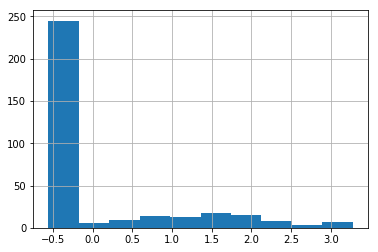

In [43]:
pace_of_work_index.hist()

### Variety

| Estimate code | Name |
|---------------|------|
|01056|Percent of workers, work location changes up to four times per year|
|01057|Percent of workers, work location changes more than four times per year|
|01059|Percent of workers, schedule changes yes|
|01080|Percent of workers, pace of work with faster/slower work periods is yes|

In [44]:
variety_index = create_index(data, ['01056', '01057', '01059', '01080'])
variety_index.head()

0    1.694450
1    0.475308
2    2.197481
3    1.212459
4    1.539859
dtype: float64

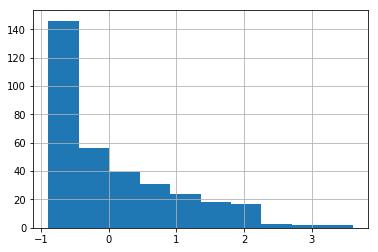

In [45]:
variety_index.hist()

### Danger

| Estimate code | Name |
|---------------|------|
|00427|Percent of workers exposed to extreme cold, constantly|
|00767|Percent of workers exposed to extreme cold|
|00440|Percent of workers exposed to extreme heat, frequently|
|00768|Percent of workers exposed to extreme heat|
|00454|Percent of workers exposed to wetness, frequently|
|00455|Percent of workers exposed to wetness, constantly|
|00845|Percent of workers exposed to wetness|
|00797|Percent of workers exposed to humidity|
|00786|Percent of workers exposed to hazardous contaminants|
|00787|Percent of workers exposed to hazardous contaminants, fully mitigated|
|00791|Percent of workers exposed to heavy vibrations|
|00792|Percent of workers exposed to high, exposed places|
|00793|Percent of workers exposed to high, exposed places, fully mitigated|
|00615|Percent of workers exposed to outdoors, frequently|
|00616|Percent of workers exposed to outdoors, constantly|
|00815|Percent of workers exposed to outdoors|
|00573|Percent of workers exposed to loud noise intensity level|
|00574|Percent of workers exposed to very loud noise intensity level|

In [46]:
danger_index = create_index(data, ['00427',
'00767',
'00440',
'00768',
'00454',
'00455',
'00845',
'00797',
'00786',
'00787',
'00791',
'00792',
'00793',
'00615',
'00616',
'00815',
'00573',
'00574'])
danger_index.head()

0    0.608791
1   -0.509271
2   -0.351598
3   -0.529763
4   -0.477826
dtype: float64

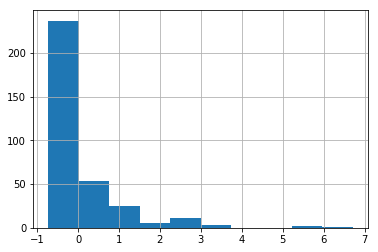

In [47]:
danger_index.hist()

### Communication

| Estimate code | Weight | Name |
|---------------|--------|------|
|01045|3|Percent of workers, frequency of contact with other contacts is continuous|
|01046|2|Percent of workers, frequency of contact with other contacts is more than once per hour|
|01047|1|Percent of workers, frequency of contact with other contacts is more than once per day|
|01050|3|Percent of workers, frequency of contact with regular contacts is continuous|	
|01051|2|Percent of workers, frequency of contact with regular contacts is more than once per hour|
|01052|1|Percent of workers, frequency of contact with regular contacts is more than once per day|
|00561|3|Percent of workers, communicating verbally is required, constantly|
|00560|2|Percent of workers, communicating verbally is required, frequently|
|00559|1|Percent of workers, communicating verbally is required, occasionally|

In [48]:
regular_contact_freq_index = create_index(data, ['01045', '01046', '01047'], [3,2,1])
other_contact_freq_index = create_index(data, ['01050', '01051', '01052'], [3,2,1])
communication_index = create_index(data, ['01045', '01046', '01047', '01050', '01051', '01052', '00561', '00560', '00559'], [3,2,1,3,2,1,3,2,1])
communication_index.head()

0    0.318742
1    0.347694
2    0.589403
3   -0.196019
4    1.281263
dtype: float64

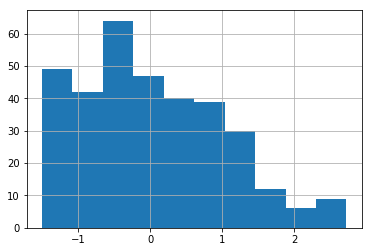

In [49]:
communication_index.hist()

In [53]:
contact_type_ratio = regular_contact_freq_index / (regular_contact_freq_index + other_contact_freq_index)
contact_type_ratio = (contact_type_ratio - contact_type_ratio.min()) / (contact_type_ratio.max() - contact_type_ratio.min())
contact_type_ratio.head()

0    0.703897
1    0.700646
2    0.709210
3    0.702590
4    0.703909
dtype: float64

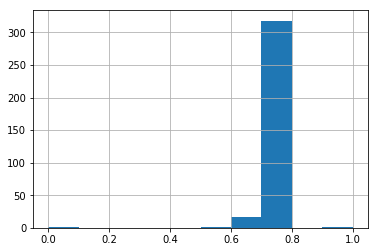

In [54]:
contact_type_ratio.hist()

#### Type of interaction

Regular Contacts:

| Estimate Code | Weight | Name | 
| ------------- | ------ | ---- |
|01030|1|Percent of workers, type of interaction with regular contacts is factual info exchange|
|01031|2|Percent of workers, type of interaction with regular contacts is coordinating
|01032|3|Percent of workers, type of interaction with regular contacts is gentle persuading|
|01033|4|Percent of workers, type of interaction with regular contacts is influencing|
|01034|5|Percent of workers, type of interaction with regular contacts is resolving controversial issues|

| Estimate Code | Weight | Name | 
| ------------- | ------ | ---- |
|01036|1|Percent of workers, type of interaction with other contacts is factual info exchange|
|01037|2|Percent of workers, type of interaction with other contacts is coordinating
|01038|3|Percent of workers, type of interaction with other contacts is gentle persuading|
|01039|4|Percent of workers, type of interaction with other contacts is influencing|
|01040|5|Percent of workers, type of interaction with other contacts is resolving controversial issues|

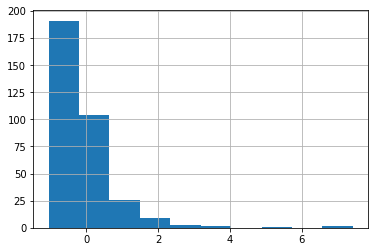

In [55]:
regular_interaction_type_index = create_index(data, ['01030', '01031', '01032', '01033', '01034'], [1,2,3,4,5])
other_interaction_type_index = create_index(data, ['01036', '01037', '01038', '01039', '01040'], [1,2,3,4,5])
interaction_type_index = regular_interaction_type_index * contact_type_ratio + other_interaction_type_index * (1 - contact_type_ratio)
interaction_type_index.hist()

In [56]:
interaction_type_index.idxmax(), interaction_type_index.idxmin()

(84, 184)

In [57]:
data['occupation_code'][84], data['occupation_code'][184]

('327', '596')

### Entry-level/Experienced

| Estimate code | Name |
|---------------|------|
|00107|Percent of workers, prior work experience is required|
|00111|Days of prior work experience (50th Percentile - median)|
|00098|Percent of workers, pre-employment training is required|
|00104|Days of pre-employment training (50th Percentile - median)|
|00122|Percent of workers, post-employment training is required|
|00119|Days of post-employment training (50th Percentile - median)|

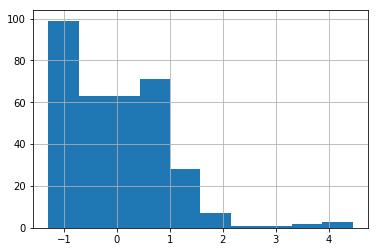

In [59]:
experience_index = create_index(data, ['00107', '00111', '00098', '00104', '00122', '00119'])
experience_index.hist()

### Ambiguous Decision Making

| Estimate code | Weight | Name |
| ------------- | ------ | ---- |
| 01068|1|Percent of workers, type of decision making is no set responses|
|01069|2|Percent of workers, type of decision making is degree of uncertainty or complexity|

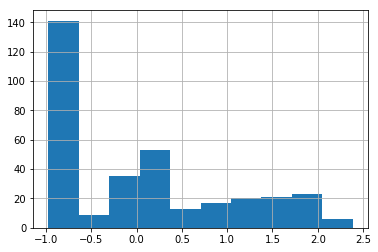

In [73]:
uncertain_decisions_index = create_index(data, ['01068', '01069'], [1, 2])
uncertain_decisions_index.hist()

In [72]:
data['occupation_code'][uncertain_decisions_index.idxmax()], data['occupation_code'][uncertain_decisions_index.idxmin()]

('001', '009')

## Outputting Values


    Physicality
    Pace of work
    Variety
    Danger
    Communication
        Type of interaction
    Entry-level/experienced
    Ambiguous decision making

In [120]:
output = pandas.DataFrame({
    'occupation_code': data['occupation_code'],
    'physicality': physicality_index,
    'pace_of_work': pace_of_work_index,
    'variety': variety_index,
    'danger': danger_index,
    'communication': communication_index,
    'interaction_complexity': interaction_type_index,
    'experience': experience_index,
    'uncertain_decisions': uncertain_decisions_index
})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1166058d0>,
      dtype=object)

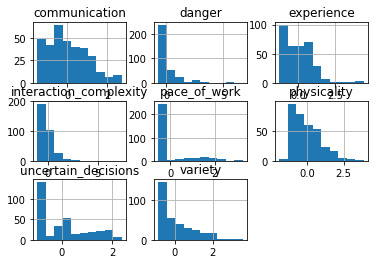

In [104]:
output.hist()

In [121]:
occupations = pandas.read_csv(
    'ordata/or.occupation', 
    delimiter='\t', 
    index_col=False, 
    usecols=['occupation_code', 'occupation_text']
)
output = occupations.merge(output, on='occupation_code')
output.to_csv('calculated_metrics.csv')
output.head()

,occupation_code,occupation_text,communication,danger,experience,interaction_complexity,pace_of_work,physicality,uncertain_decisions,variety
0,000,All Workers,0.318742,0.608791,0.947750,0.534671,0.874105,0.492775,0.411485,1.694450
1,001,Chief Executives,0.347694,-0.509271,0.186305,7.184863,1.157703,-0.710089,2.386254,0.475308
2,003,General and Operations Managers,0.589403,-0.351598,0.444248,3.230518,-0.555542,-0.376109,1.997757,2.197481
3,007,Marketing Managers,-0.196019,-0.529763,0.290622,1.663645,-0.555542,-0.931286,2.094041,1.212459
4,008,Sales Managers,1.281263,-0.477826,0.315164,2.081840,-0.555542,-0.499861,1.932228,1.539859


In [113]:
output.sort_values(by='communication')['occupation_text']

44                             Computer Systems Analysts
36                                              Auditors
38                                    Financial Analysts
39                           Personal Financial Advisors
40                                Insurance Underwriters
288                                             Plumbers
43                      Financial Specialists, All Other
46                     Software Developers, Applications
145                                 Physician Assistants
53                  Computer Network Support Specialists
139                         Dietitians and Nutritionists
57                                   Aerospace Engineers
132                                              Editors
157        Medical and Clinical Laboratory Technologists
60                Electronics Engineers, Except Computer
64                                              Chemists
127                                    Flight Attendants
68                             

In [118]:
pearson_corr = output.corr('pearson')
pearson_corr

,communication,danger,experience,interaction_complexity,pace_of_work,physicality,uncertain_decisions,variety
communication,1.000000,0.051308,0.286775,0.192243,0.421381,0.147421,0.088540,0.342504
danger,0.051308,1.000000,0.163584,-0.107628,0.340853,0.614912,-0.072669,0.374556
experience,0.286775,0.163584,1.000000,0.350356,0.156392,0.193082,0.413957,0.521398
interaction_complexity,0.192243,-0.107628,0.350356,1.000000,0.032610,-0.105300,0.533731,0.406792
pace_of_work,0.421381,0.340853,0.156392,0.032610,1.000000,0.245907,0.011649,0.228933
physicality,0.147421,0.614912,0.193082,-0.105300,0.245907,1.000000,-0.136272,0.431526
uncertain_decisions,0.088540,-0.072669,0.413957,0.533731,0.011649,-0.136272,1.000000,0.277464
variety,0.342504,0.374556,0.521398,0.406792,0.228933,0.431526,0.277464,1.000000


In [119]:
spearman_corr = output.corr('spearman')
spearman_corr

,communication,danger,experience,interaction_complexity,pace_of_work,physicality,uncertain_decisions,variety
communication,1.000000,0.151258,0.313559,0.325674,0.415743,0.236882,0.168140,0.420838
danger,0.151258,1.000000,0.190066,-0.090186,0.369026,0.838881,-0.078900,0.458679
experience,0.313559,0.190066,1.000000,0.498203,0.185943,0.184525,0.474252,0.547425
interaction_complexity,0.325674,-0.090186,0.498203,1.000000,0.092228,-0.054404,0.571664,0.469809
pace_of_work,0.415743,0.369026,0.185943,0.092228,1.000000,0.311364,0.014033,0.323495
physicality,0.236882,0.838881,0.184525,-0.054404,0.311364,1.000000,-0.123337,0.481902
uncertain_decisions,0.168140,-0.078900,0.474252,0.571664,0.014033,-0.123337,1.000000,0.296639
variety,0.420838,0.458679,0.547425,0.469809,0.323495,0.481902,0.296639,1.000000
